# Convolución 2D

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import cv2 as cv

### Cargar Imagen en Grayscale

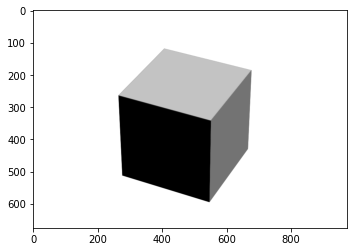

In [2]:
def loadImage(url):
    return cv.imread(url, cv.IMREAD_GRAYSCALE)

img = np.array(loadImage('./images/Image1.png'))
plt.imshow(img, cmap="gray")

### Multiplicación de Kernel y Convolución con Bordes

In [3]:
def getKernel(section, kernel):
    n = section.size
    return np.sum((section*kernel)) / n

In [4]:
def convolution(img, kernel, padding=1):
    iRows, iColumns = img.shape
    kRows, kColumns = kernel.shape

    # [(W−K+2P)/S]+1
    iColumnsFiltered = int((iColumns - kColumns + 2*padding) + 1)
    iRowsFiltered = int((iRows - kRows + 2*padding) + 1)
    response = np.zeros((iRowsFiltered, iColumnsFiltered))

    paddingImg = img
    if padding != 0:
        paddingImg = np.zeros(
            (iRowsFiltered + 2*padding, iColumnsFiltered + 2*padding))
        # la imagen se incluye dentro de la matriz
        paddingImg[padding:-padding, padding:-padding] = img

    for i in range(iRowsFiltered - kRows):
        for j in range(iColumnsFiltered - kColumns):
                response[i, j] = getKernel(
                                    paddingImg[i:i + kRows,
                                    j:j + kColumns],kernel)
    return response

### Obtener Laplacian

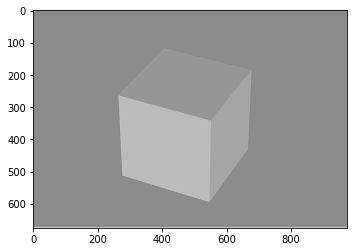

In [5]:
kernel = np.array([[0,1,0],
          [1,-5,1],
          [0,1,0]])

laplacian = convolution(img, kernel)
plt.imshow(laplacian, cmap='gray')

#### Obtenemos SobelX y SobelY
>Obtener SobelX

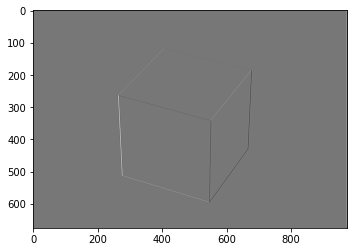

In [6]:
kernel = np.array([[-1,0,1],
          [-2,0,2],
          [-1,0,1]])

plt.imshow(convolution(laplacian, kernel), cmap='gray')

>Obtener Sobel y

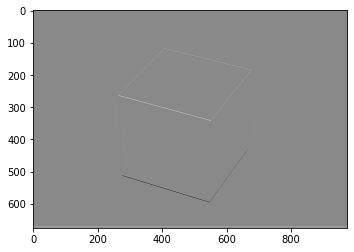

In [7]:
kernel = np.array([[-1,-2,-1],
          [0,0,0],
          [1,2,1]])

plt.imshow(convolution(laplacian, kernel), cmap='gray')
